## Assignment 2 | Data Exploration and Preprocessing
---
### Special Topics in Information Systems course | Faculty of Engineering | AlexU
#### Iris Dataset 
---

### 1. import dataset


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

% matplotlib inline


In [159]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data',
                  skiprows=3)
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.test',
                  skiprows=3)


In [105]:
print("segmentation.data shape: ",df1.shape)
print("segmentation.test shape: ",df2.shape)
df = pd.concat([df1, df2])
print("new training dataset shape: ",df.shape)
df.head()

segmentation.data shape:  (210, 19)
segmentation.test shape:  (2100, 19)
new training dataset shape:  (2310, 19)


REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
BRICKFACE                140.0                125.0                   9   
BRICKFACE                188.0                133.0                   9   
BRICKFACE                105.0                139.0                   9   
BRICKFACE                 34.0                137.0                   9   
BRICKFACE                 39.0                111.0                   9   

           SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
BRICKFACE                   0.0                   0.0    0.277778  0.062963   
BRICKFACE                   0.0                   0.0    0.333333  0.266667   
BRICKFACE                   0.0                   0.0    0.277778  0.107407   
BRICKFACE                   0.0                   0.0    0.500000  0.166667   
BRICKFACE                   0.0                   0.0    0.722222  0.374074   

           HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
BRICKFACE    0.666667  0.311111        6.185185     7.333334      7.666666   
BRICKFACE    0.500000  0.077778        6.666666     8.333334      7.777778   
BRICKFACE    0.833333  0.522222        6.111111     7.555555      7.222222   
BRICKFACE    1.111111  0.474074        5.851852     7.777778      6.444445   
BRICKFACE    0.888889  0.429629        6.037037     7.000000      7.666666   

           RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  \
BRICKFACE       3.555556    3.444444     4.444445     -7.888889    7.777778   
BRICKFACE       3.888889    5.000000     3.333333     -8.333333    8.444445   
BRICKFACE       3.555556    4.333334     3.333333     -7.666666    7.555555   
BRICKFACE       3.333333    5.777778     1.777778     -7.555555    7.777778   
BRICKFACE       3.444444    2.888889     4.888889     -7.777778    7.888889   

           SATURATION-MEAN  HUE-MEAN  
BRICKFACE         0.545635 -1.121818  
BRICKFACE         0.538580 -0.924817  
BRICKFACE         0.532628 -0.965946  
BRICKFACE         0.573633 -0.744272  
BRICKFACE         0.562919 -1.175773

# Understanding Data

The dataset contains 2310 readings/samples, 19 features for each. And there are 7 class labels.  

**Classes**:
- WINDOW
- CEMENT
- FOLIAGE
- GRASS
- SKY
- PATH
- BRICKFACE

**Features**:
- VEDGE-MEAN
- REGION-PIXEL-COUNT
- RAWRED-MEAN
- SHORT-LINE-DENSITY-2
- EXRED-MEAN
- VEDGE-SD
- REGION-CENTROID-COL
- SHORT-LINE-DENSITY-5
- HEDGE-SD
- EXBLUE-MEAN
- INTENSITY-MEAN
- RAWBLUE-MEAN
- HUE-MEAN
- RAWGREEN-MEAN
- HEDGE-MEAN
- VALUE-MEAN
- SATURATION-MEAN
- EXGREEN-MEAN
- REGION-CENTROID-ROW



In [107]:
# Resetting index to class label
df.reset_index(inplace=True)
df.rename(inplace=True, columns={"index":"CLASS"})

#sort data by classb
df = df.sort_index()
df.head()

CLASS  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0  BRICKFACE                140.0                125.0                   9   
1  BRICKFACE                188.0                133.0                   9   
2  BRICKFACE                105.0                139.0                   9   
3  BRICKFACE                 34.0                137.0                   9   
4  BRICKFACE                 39.0                111.0                   9   

   SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                   0.0                   0.0    0.277778  0.062963   
1                   0.0                   0.0    0.333333  0.266667   
2                   0.0                   0.0    0.277778  0.107407   
3                   0.0                   0.0    0.500000  0.166667   
4                   0.0                   0.0    0.722222  0.374074   

   HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
0    0.666667  0.311111        6.185185     7.333334      7.666666   
1    0.500000  0.077778        6.666666     8.333334      7.777778   
2    0.833333  0.522222        6.111111     7.555555      7.222222   
3    1.111111  0.474074        5.851852     7.777778      6.444445   
4    0.888889  0.429629        6.037037     7.000000      7.666666   

   RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  \
0       3.555556    3.444444     4.444445     -7.888889    7.777778   
1       3.888889    5.000000     3.333333     -8.333333    8.444445   
2       3.555556    4.333334     3.333333     -7.666666    7.555555   
3       3.333333    5.777778     1.777778     -7.555555    7.777778   
4       3.444444    2.888889     4.888889     -7.777778    7.888889   

   SATURATION-MEAN  HUE-MEAN  
0         0.545635 -1.121818  
1         0.538580 -0.924817  
2         0.532628 -0.965946  
3         0.573633 -0.744272  
4         0.562919 -1.175773

In [108]:
classes = list(set(df['CLASS']))
classes

['FOLIAGE', 'PATH', 'GRASS', 'SKY', 'CEMENT', 'BRICKFACE', 'WINDOW']

### 2. Data Exploration

In [109]:
df.describe()

REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
count          2310.000000          2310.000000              2310.0   
mean            124.913853           123.417316                 9.0   
std              72.956532            57.483851                 0.0   
min               1.000000            11.000000                 9.0   
25%              62.000000            81.000000                 9.0   
50%             121.000000           122.000000                 9.0   
75%             189.000000           172.000000                 9.0   
max             254.000000           251.000000                 9.0   

       SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2   VEDGE-MEAN     VEDGE-SD  \
count           2310.000000           2310.000000  2310.000000  2310.000000   
mean               0.014334              0.004714     1.893939     5.709320   
std                0.040154              0.024234     2.698908    44.846457   
min                0.000000              0.000000     0.000000     0.000000   
25%                0.000000              0.000000     0.722222     0.355555   
50%                0.000000              0.000000     1.222224     0.833333   
75%                0.000000              0.000000     2.166667     1.806367   
max                0.333333              0.222222    29.222221   991.718400   

        HEDGE-MEAN      HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
count  2310.000000  2.310000e+03     2310.000000  2310.000000   2310.000000   
mean      2.424723  8.243692e+00       37.051595    32.821308     44.187879   
std       3.610084  5.881152e+01       38.176410    35.036774     43.527461   
min       0.000000 -1.589457e-08        0.000000     0.000000      0.000000   
25%       0.777780  4.216373e-01        7.296296     7.000000      9.555555   
50%       1.444444  9.629633e-01       21.592592    19.555555     27.666667   
75%       2.555556  2.183269e+00       53.212964    47.333332     64.888890   
max      44.722225  1.386329e+03      143.444440   137.111110    150.888890   

       RAWGREEN-MEAN   EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN   VALUE-MEAN  \
count    2310.000000  2310.000000  2310.000000   2310.000000  2310.000000   
mean       34.145599   -12.690861    21.408850     -8.717989    45.137470   
std        36.364773    11.583562    19.571819     11.551628    42.921764   
min         0.000000   -49.666668   -12.444445    -33.888890     0.000000   
25%         6.027778   -18.555555     4.138889    -16.777779    11.555555   
50%        20.333334   -10.888889    19.666666    -10.888889    28.666666   
75%        46.500001    -4.222222    35.777780     -3.222222    64.888890   
max       142.555560     9.888889    82.000000     24.666666   150.888890   

       SATURATION-MEAN     HUE-MEAN  
count      2310.000000  2310.000000  
mean          0.426893    -1.362897  
std           0.228309     1.545335  
min           0.000000    -3.044175  
25%           0.284235    -2.188057  
50%           0.374803    -2.051200  
75%           0.540123    -1.562308  
max           1.000000     2.912480

### Features Variablity and Distribution

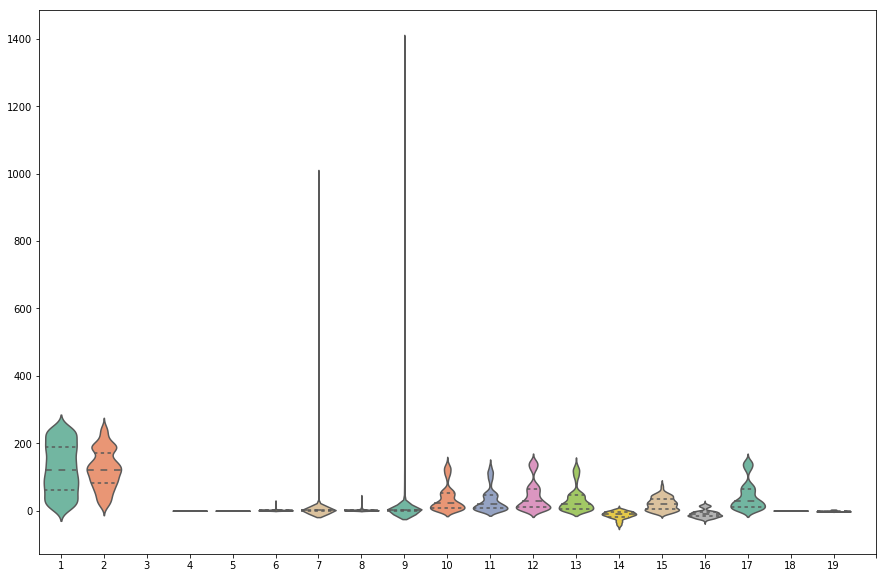

In [116]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sb.violinplot(ax=ax, data=df, palette="Set2", split=True,
                   scale="count", inner="quartile")

_ = ax.set(xticks=range(len(df.columns)), xticklabels=range(1, len(df.columns)))


In [117]:
# get feature by index
df.columns[8]

'HEDGE-MEAN'

## Classes distribution

SKY          330
FOLIAGE      330
BRICKFACE    330
GRASS        330
PATH         330
WINDOW       330
CEMENT       330
Name: CLASS, dtype: int64

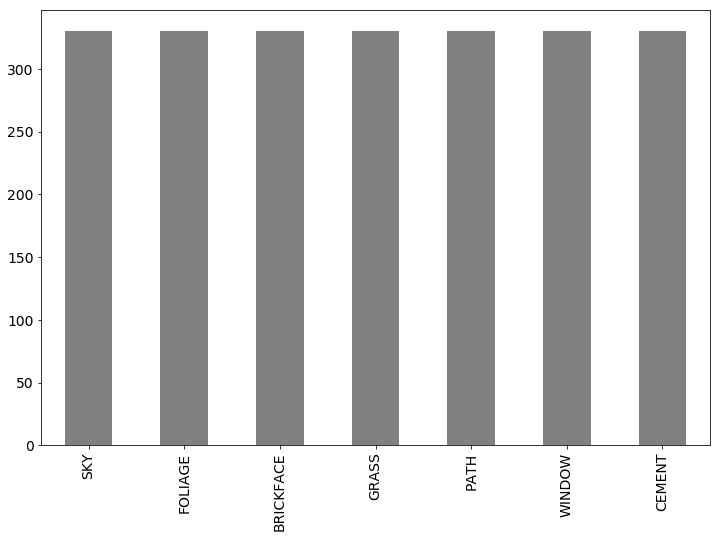

In [118]:
plt.figure()
class_counts = df['CLASS'].value_counts()
class_counts.plot.bar(figsize=(12,8), color="grey", fontsize=14)
class_counts

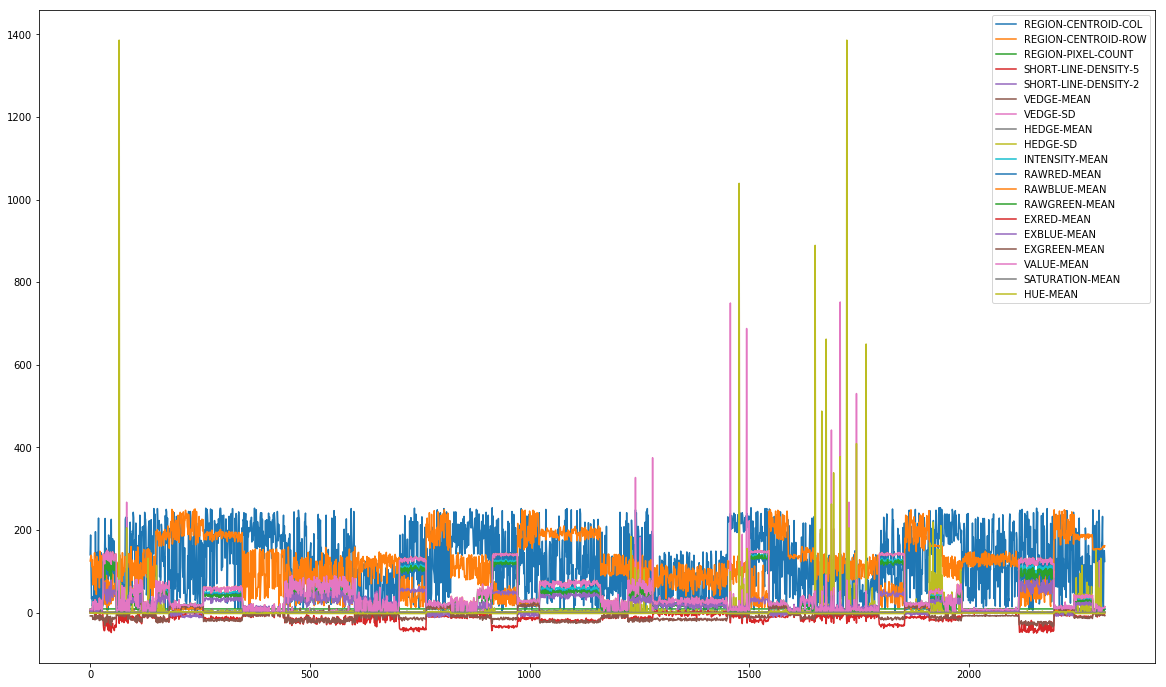

In [123]:
df.plot(figsize=(20,12));

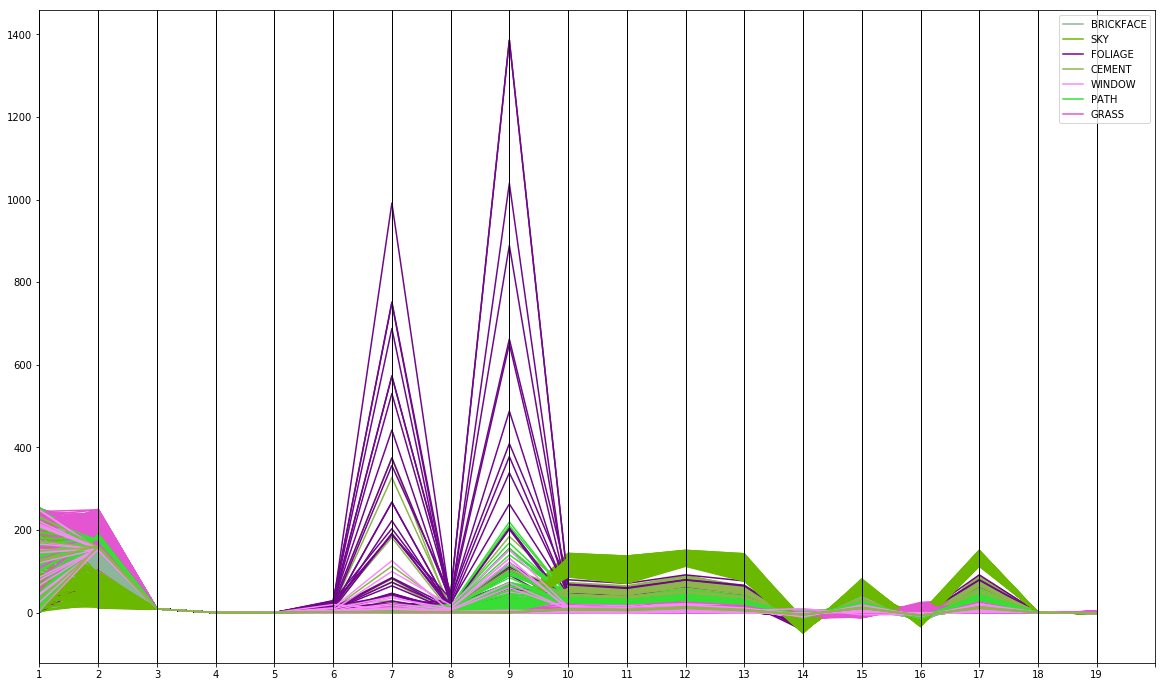

In [126]:
plt.figure(figsize=(20,12))
ax = pd.plotting.parallel_coordinates(df, 'CLASS');
ax.set(xticks=range(len(df.columns)), xticklabels=range(1, len(df.columns)));
ax.grid(False)

## Features Corellations

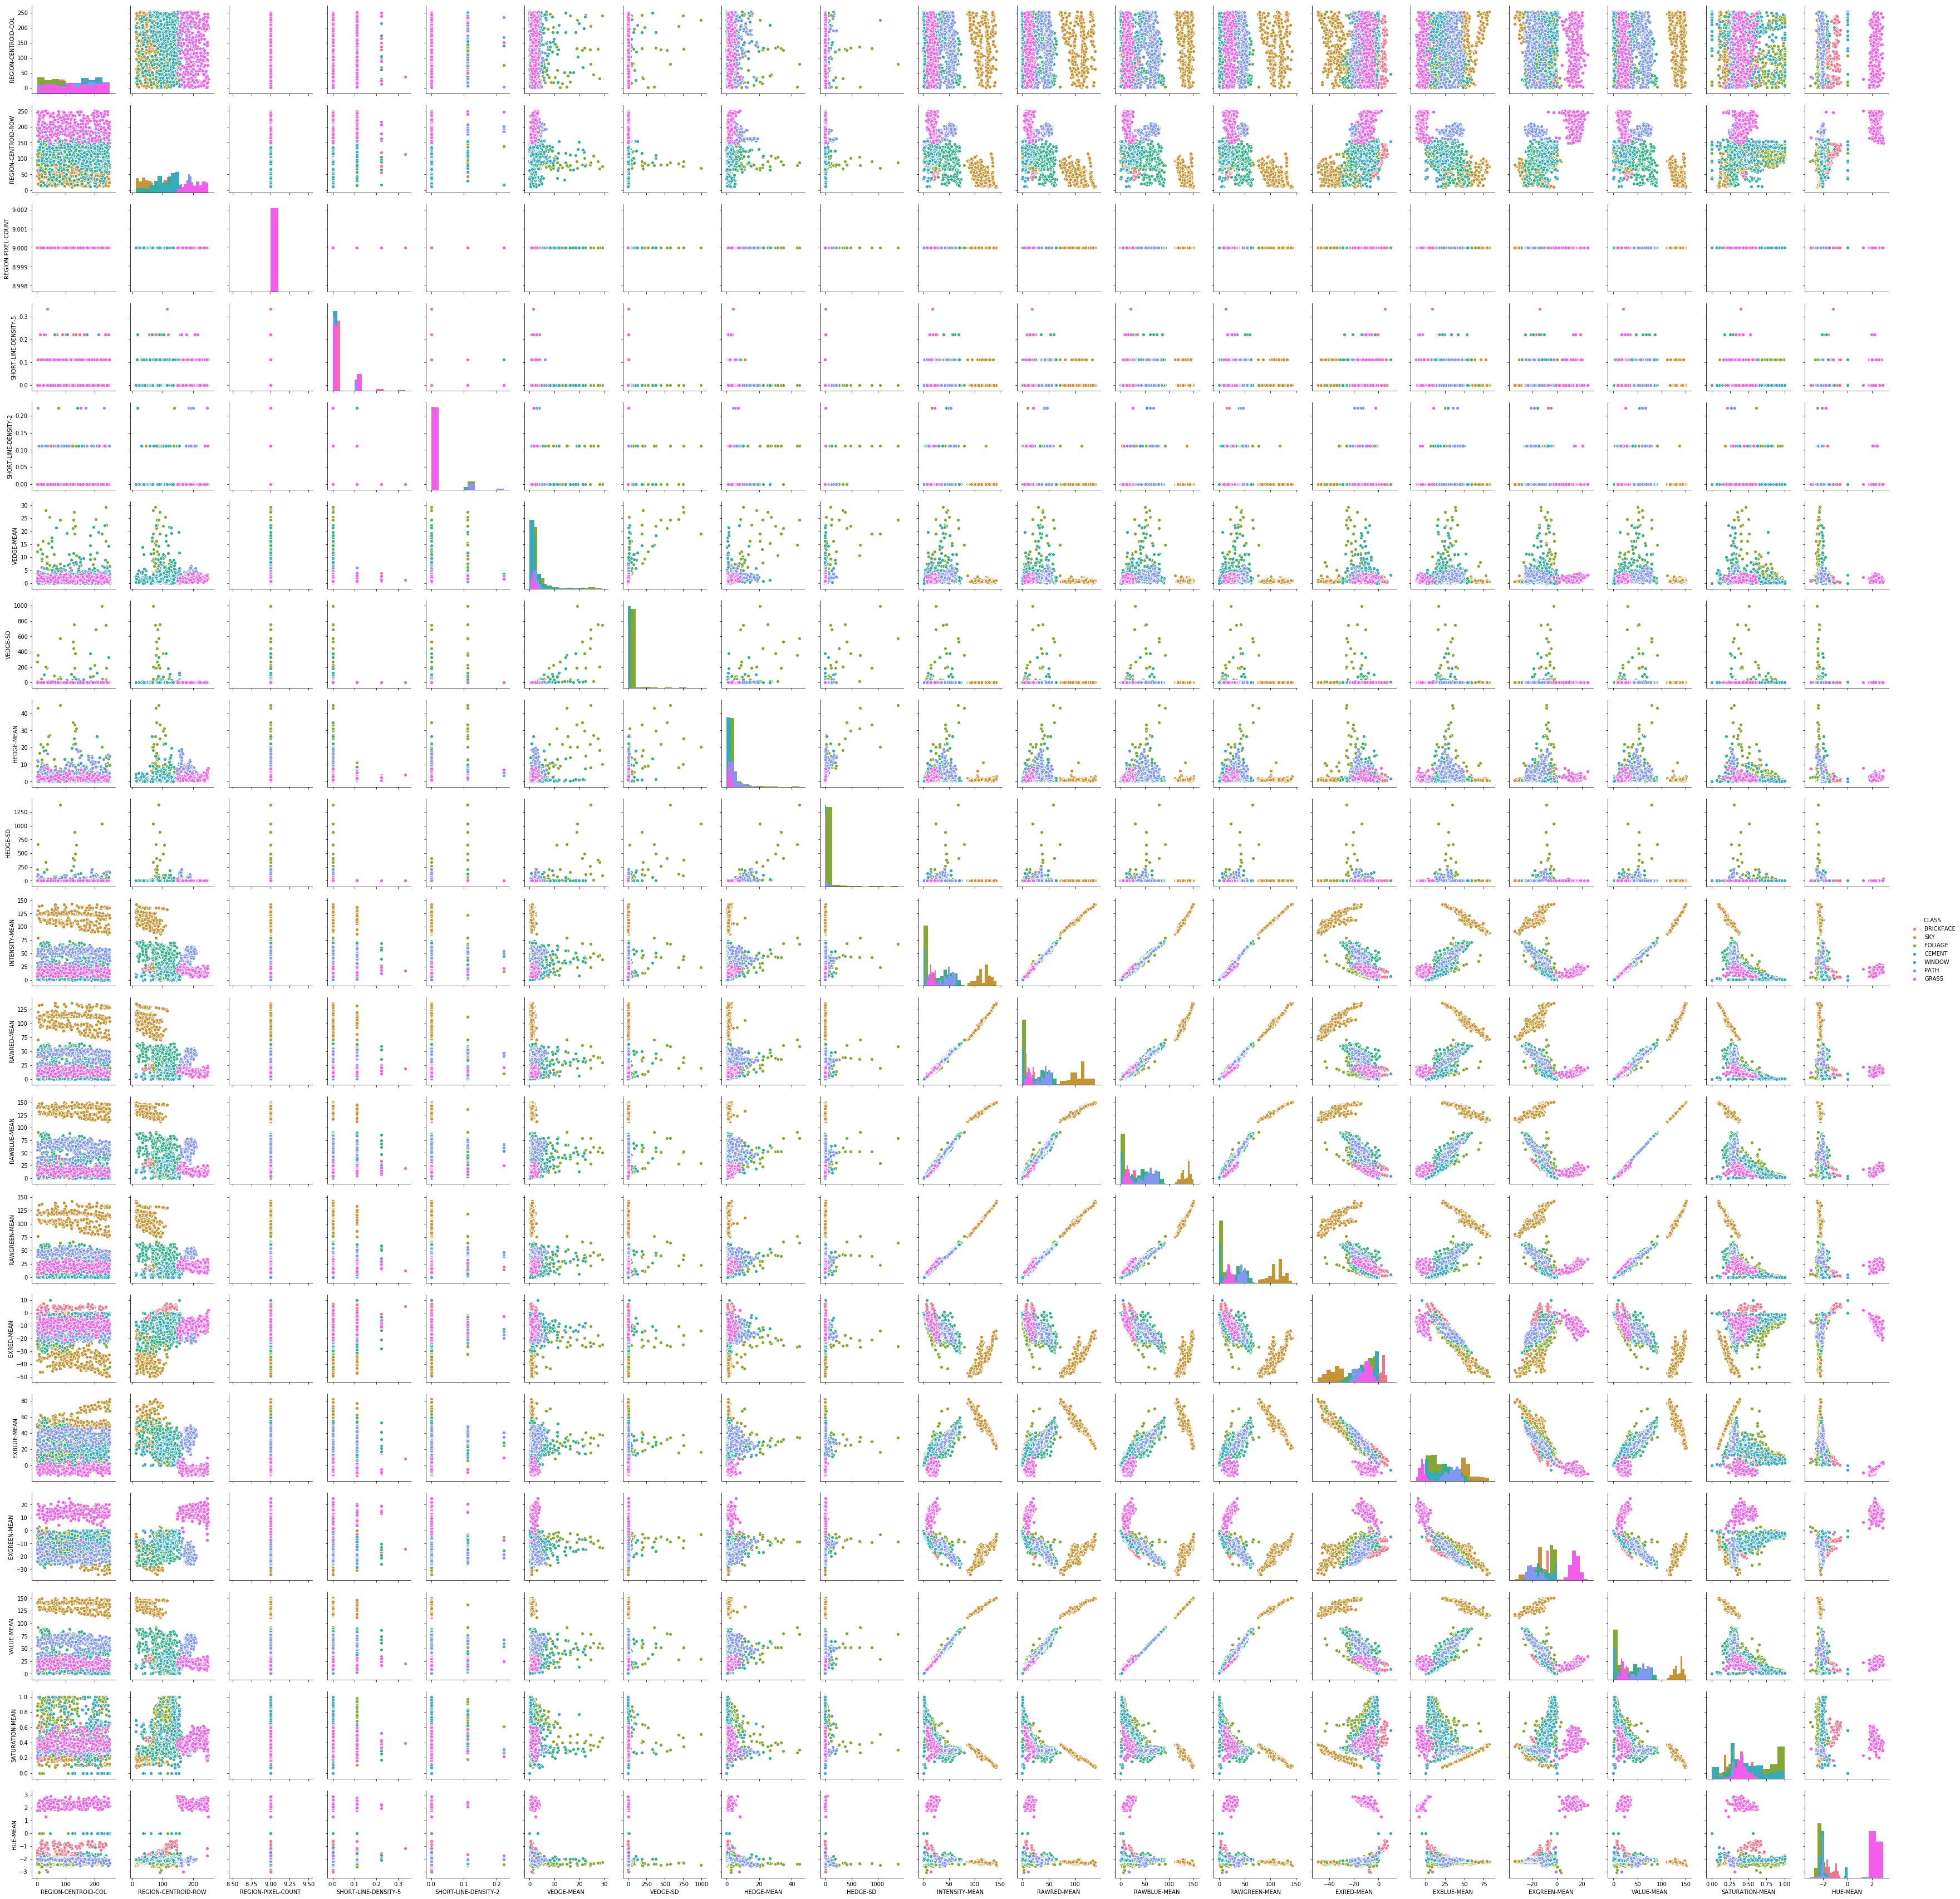

In [127]:
"""
cls = ['blue', 'red', 'yellow', 'orange', 'green', 'black', 'purple']
colors = []
for c in cls:
    colors += [c]*330
sctr = pd.plotting.scatter_matrix(df, figsize=(16,10), color=colors, diagonal="hist")
"""
sb_plt = sb.pairplot(df, diag_kind='hist', hue='CLASS', palette="husl");


### Pearsons's r

In [128]:
df.fillna(inplace=True, value=0)

In [129]:
pearson_corr = df.corr(method='pearson', min_periods=1)
pearson_corr

REGION-CENTROID-COL  REGION-CENTROID-ROW  \
REGION-CENTROID-COL              1.000000             0.026768   
REGION-CENTROID-ROW              0.026768             1.000000   
REGION-PIXEL-COUNT                    NaN                  NaN   
SHORT-LINE-DENSITY-5            -0.051962             0.064891   
SHORT-LINE-DENSITY-2            -0.015964             0.041869   
VEDGE-MEAN                      -0.011304             0.026146   
VEDGE-SD                         0.021960            -0.053578   
HEDGE-MEAN                      -0.018914             0.105223   
HEDGE-SD                        -0.001939            -0.021077   
INTENSITY-MEAN                   0.058957            -0.465240   
RAWRED-MEAN                      0.054673            -0.468009   
RAWBLUE-MEAN                     0.058169            -0.481521   
RAWGREEN-MEAN                    0.063381            -0.437971   
EXRED-MEAN                      -0.086816             0.353175   
EXBLUE-MEAN                      0.043098            -0.490219   
EXGREEN-MEAN                     0.014035             0.476421   
VALUE-MEAN                       0.060189            -0.458388   
SATURATION-MEAN                 -0.108214             0.081556   
HUE-MEAN                         0.039299             0.592930   

                      REGION-PIXEL-COUNT  SHORT-LINE-DENSITY-5  \
REGION-CENTROID-COL                  NaN             -0.051962   
REGION-CENTROID-ROW                  NaN              0.064891   
REGION-PIXEL-COUNT                   NaN                   NaN   
SHORT-LINE-DENSITY-5                 NaN              1.000000   
SHORT-LINE-DENSITY-2                 NaN             -0.009024   
VEDGE-MEAN                           NaN             -0.020206   
VEDGE-SD                             NaN             -0.032781   
HEDGE-MEAN                           NaN             -0.021286   
HEDGE-SD                             NaN             -0.037996   
INTENSITY-MEAN                       NaN             -0.018211   
RAWRED-MEAN                          NaN             -0.016755   
RAWBLUE-MEAN                         NaN             -0.021392   
RAWGREEN-MEAN                        NaN             -0.015604   
EXRED-MEAN                           NaN              0.028013   
EXBLUE-MEAN                          NaN             -0.036164   
EXGREEN-MEAN                         NaN              0.033182   
VALUE-MEAN                           NaN             -0.015886   
SATURATION-MEAN                      NaN             -0.043221   
HUE-MEAN                             NaN              0.112989   

                      SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  HEDGE-MEAN  \
REGION-CENTROID-COL              -0.015964   -0.011304  0.021960   -0.018914   
REGION-CENTROID-ROW               0.041869    0.026146 -0.053578    0.105223   
REGION-PIXEL-COUNT                     NaN         NaN       NaN         NaN   
SHORT-LINE-DENSITY-5             -0.009024   -0.020206 -0.032781   -0.021286   
SHORT-LINE-DENSITY-2              1.000000    0.262575  0.193728    0.303182   
VEDGE-MEAN                        0.262575    1.000000  0.637452    0.559491   
VEDGE-SD                          0.193728    0.637452  1.000000    0.471016   
HEDGE-MEAN                        0.303182    0.559491  0.471016    1.000000   
HEDGE-SD                          0.243155    0.488347  0.703049    0.668179   
INTENSITY-MEAN                   -0.006911    0.005129  0.003006    0.033973   
RAWRED-MEAN                      -0.012471   -0.005482 -0.002138    0.026059   
RAWBLUE-MEAN                      0.003078    0.020498  0.006782    0.043846   
RAWGREEN-MEAN                    -0.013435   -0.003099  0.003410    0.029406   
EXRED-MEAN                       -0.044829   -0.100457 -0.049123   -0.099434   
EXBLUE-MEAN                       0.060979    0.106744  0.027659    0.093738   
EXGREEN-MEAN                     -0.058362   -0.080120  0.002396   -0.059111   
VALUE-MEAN          

In [130]:
# note that REGION-PIXEL-COUNT std is zero so the correlation between REGION-PIXEL-COUNT and any
# other variable is undefined

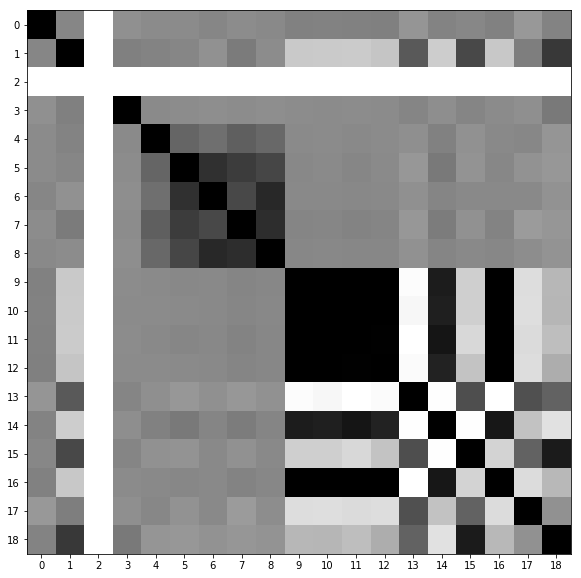

In [132]:
import matplotlib.cm as cm
fig = plt.figure(figsize=(16, 10))
plt.imshow(pearson_corr, interpolation='None', cmap=cm.gray_r)
plt.xticks(range(0,19))
plt.yticks(range(0,19))
plt.show()

### Covariance matrix

In [133]:
cov_values = np.cov(df.drop(columns=["CLASS"]).values)

In [134]:
cov_values.shape

(2310, 2310)

In [135]:
cov_values

array([[1703.17062848, 2080.54541309, 1546.5736659 , ..., 1834.559962  ,
        1961.23624668, 1802.58229088],
       [2080.54541309, 2579.74378542, 1840.56740887, ..., 2189.62126734,
        2368.84158891, 2144.87099696],
       [1546.5736659 , 1840.56740887, 1467.77486692, ..., 1730.20753018,
        1813.55742051, 1707.44150118],
       ...,
       [1834.559962  , 2189.62126734, 1730.20753018, ..., 2051.15895895,
        2154.86383473, 2025.27046414],
       [1961.23624668, 2368.84158891, 1813.55742051, ..., 2154.86383473,
        2284.21050157, 2123.86469938],
       [1802.58229088, 2144.87099696, 1707.44150118, ..., 2025.27046414,
        2123.86469938, 2002.89099122]])

In [136]:
def plt_histogram(class_name, bins_num=5):
    plt.figure(figsize=(14,7))
    plt.title("Class: " + class_name)
    data = df[df['CLASS'] == class_name]
    for cl in data.columns[1:]:
        plt.hist(data[cl], alpha=0.6, bins=bins_num, label=cl);
    plt.legend();

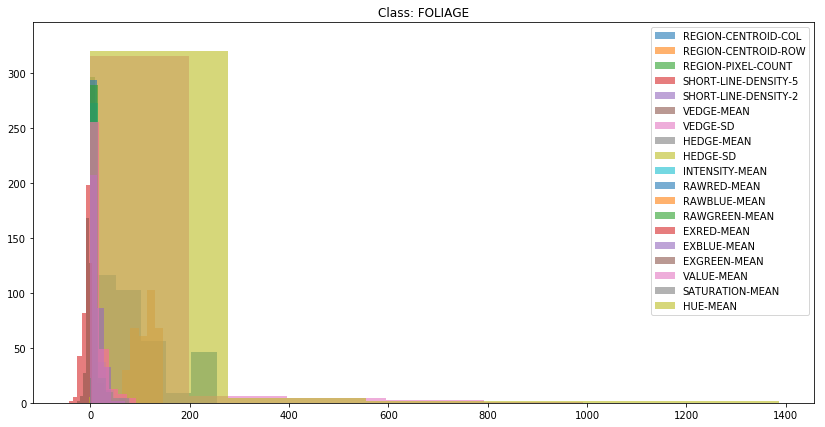

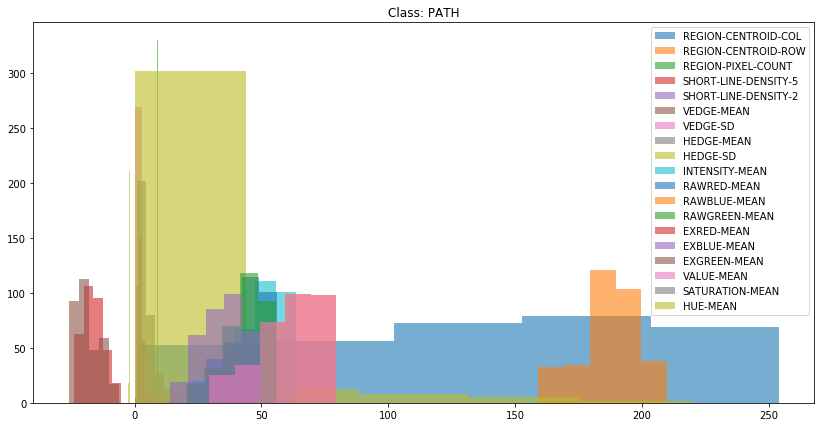

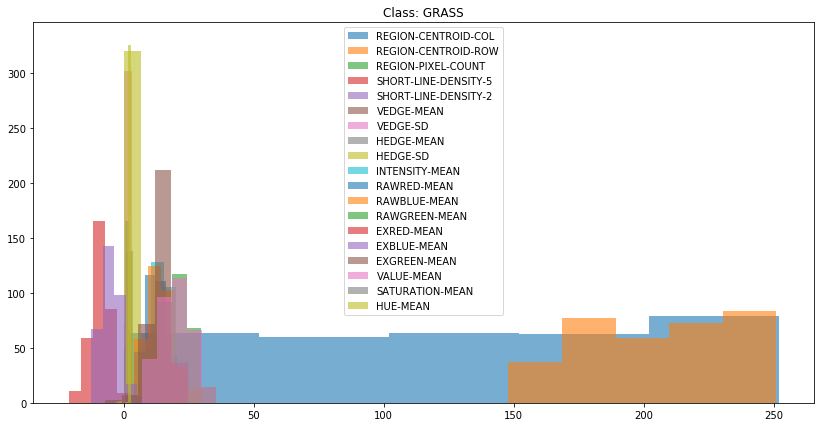

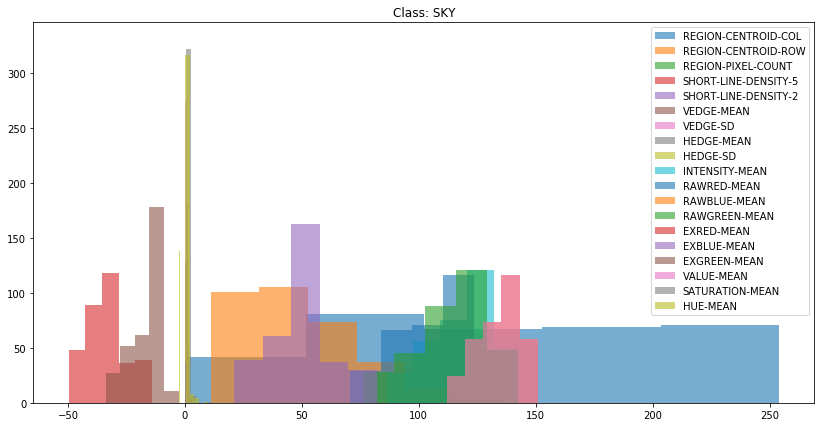

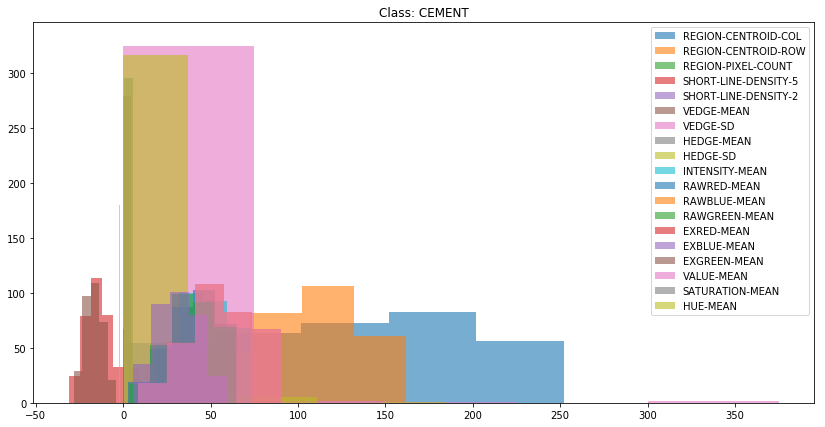

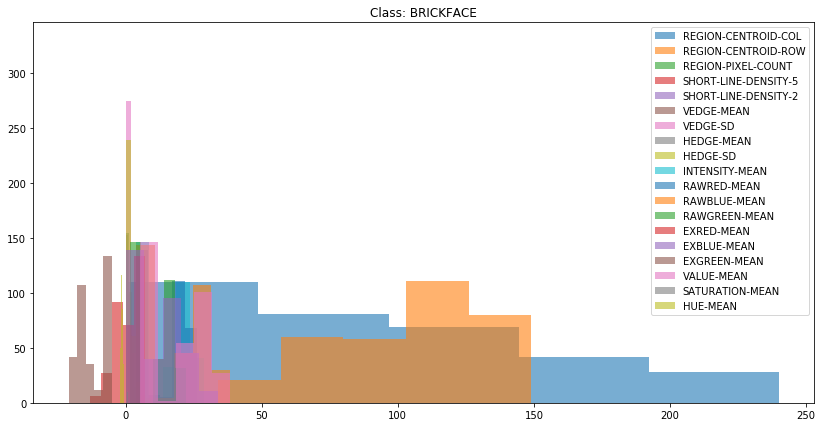

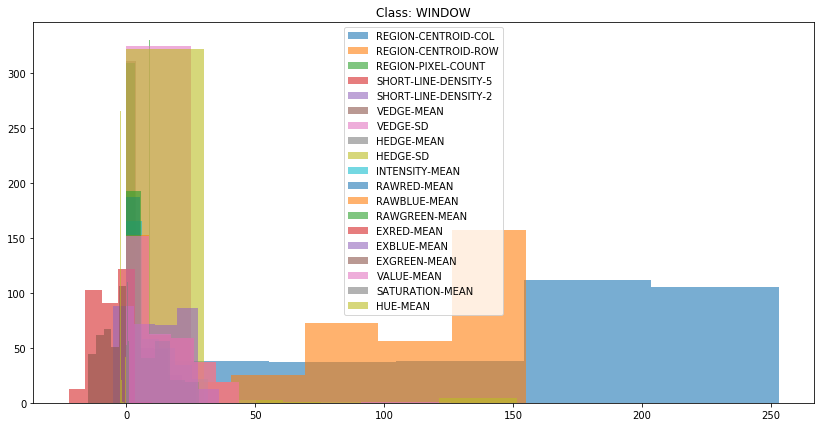

In [137]:

for cl in classes:
    plt_histogram(cl, 5)


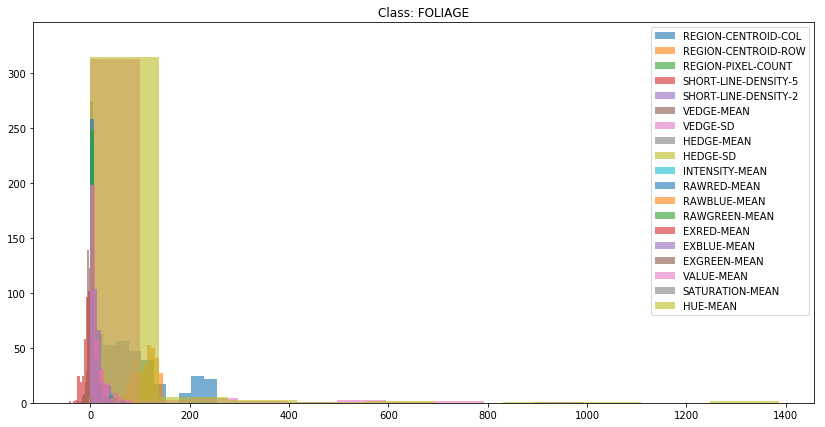

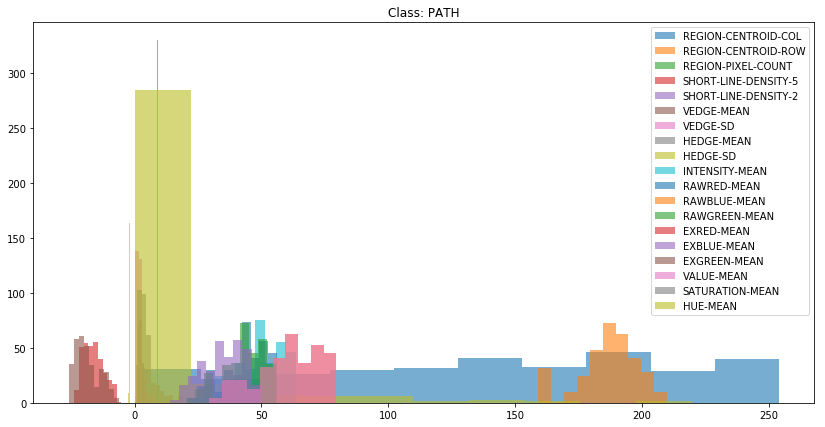

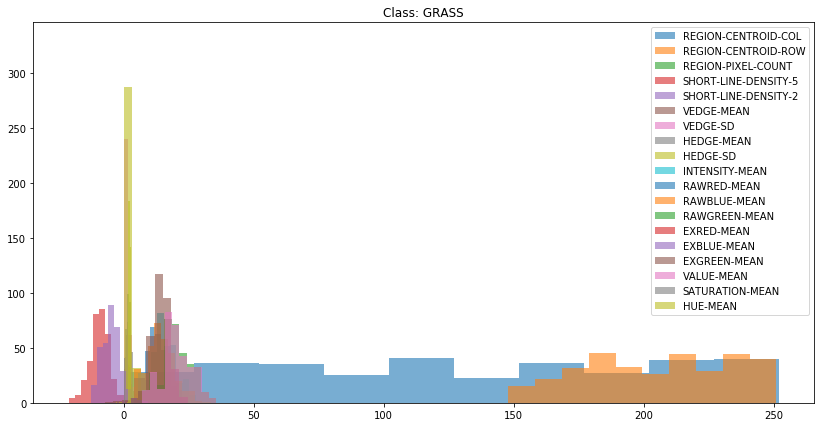

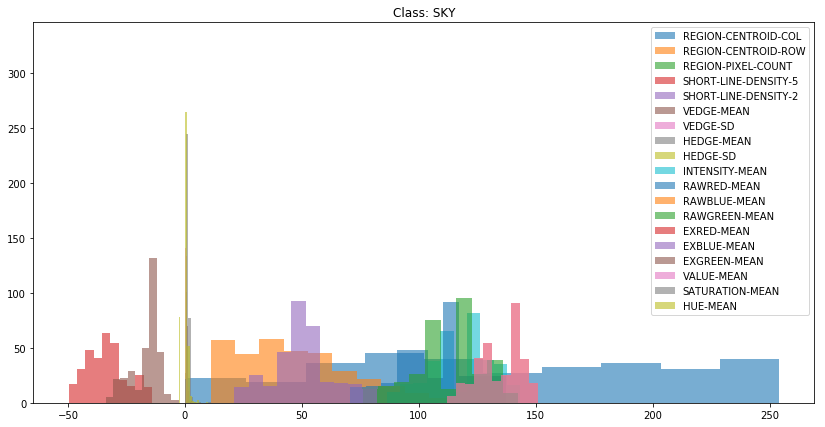

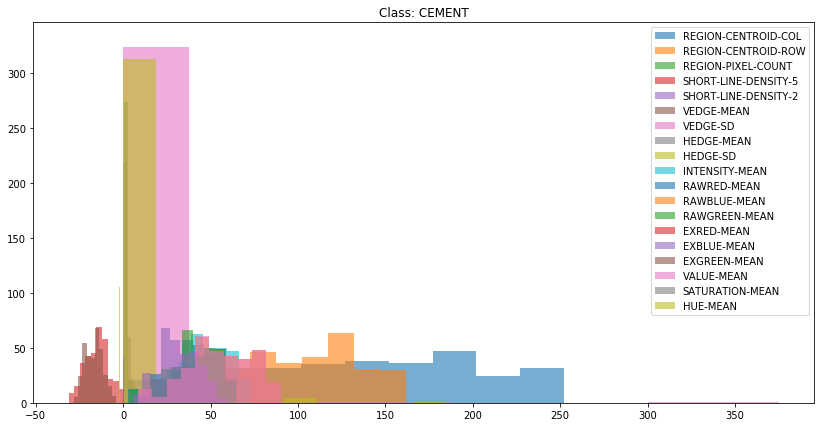

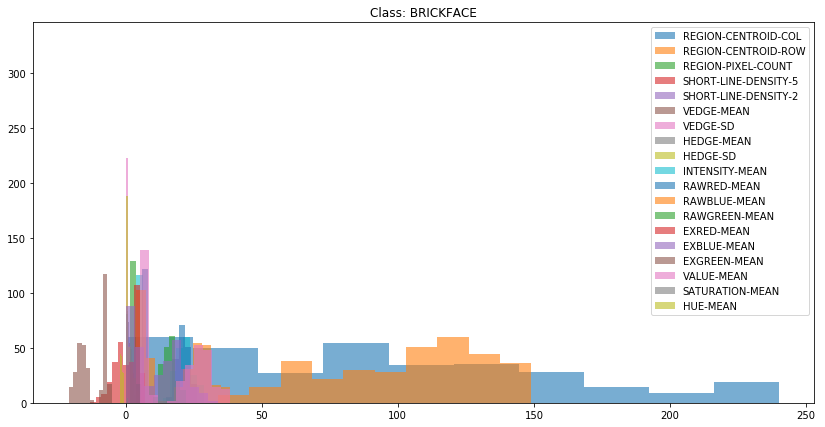

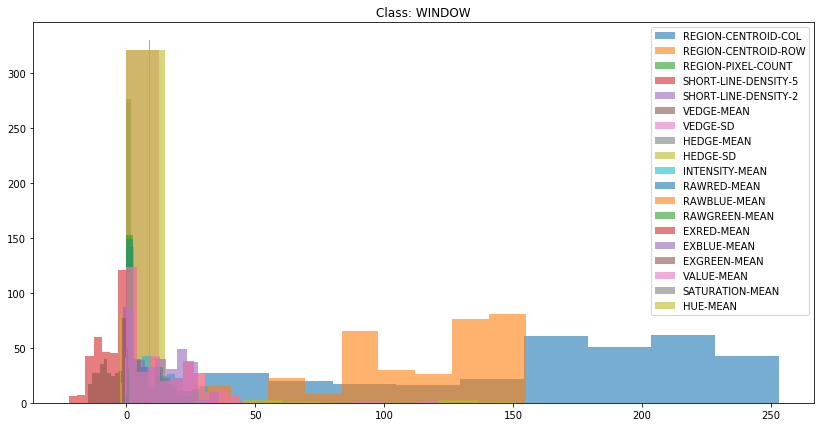

In [138]:
for cl in classes:
    plt_histogram(cl, 10)


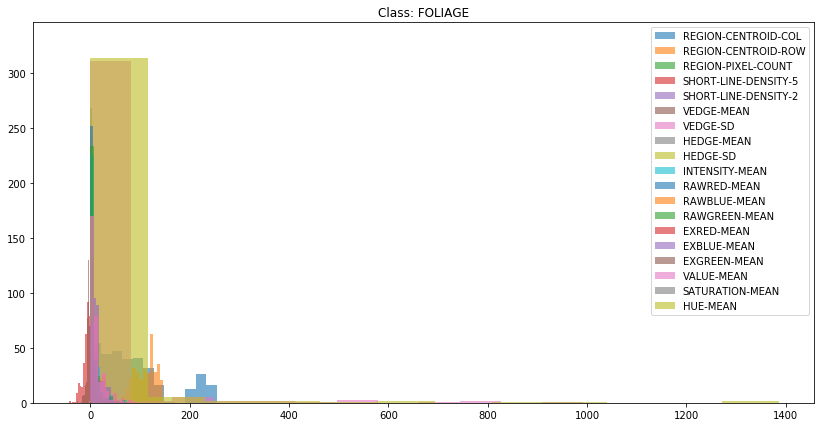

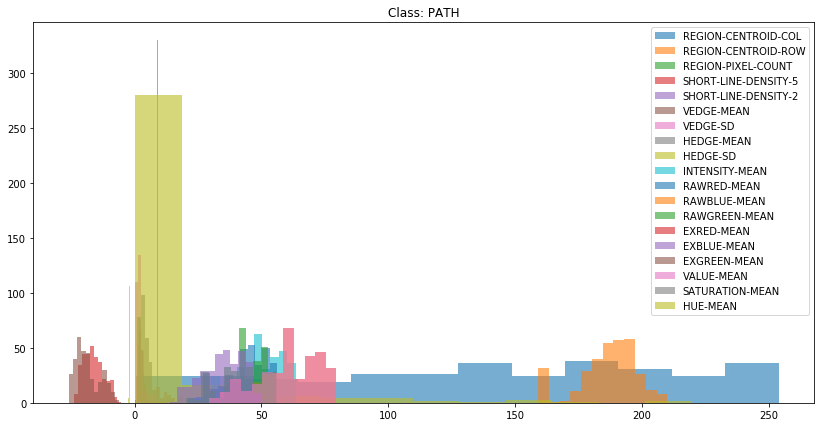

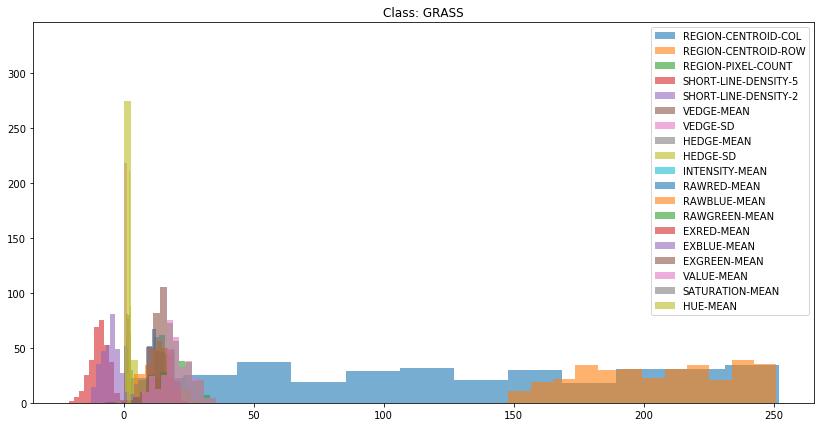

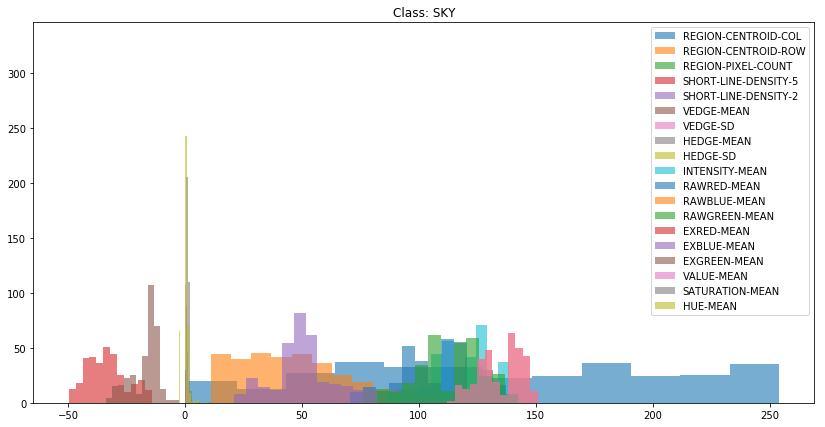

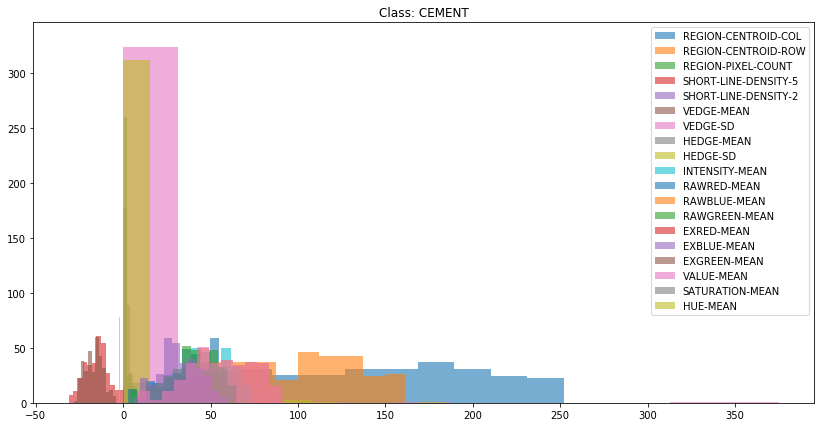

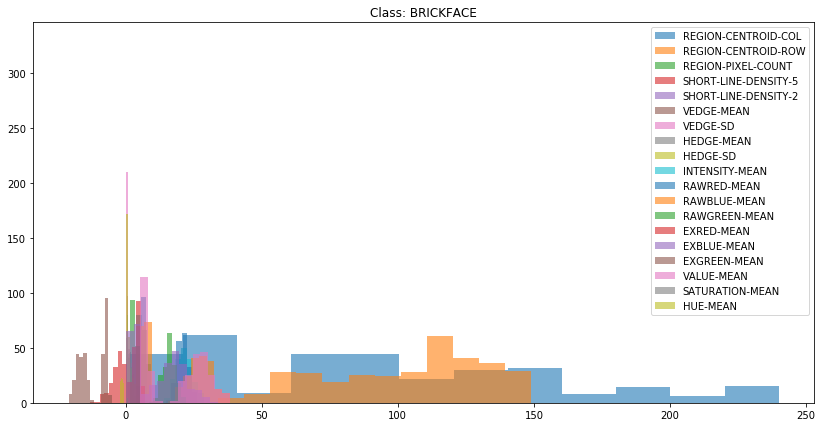

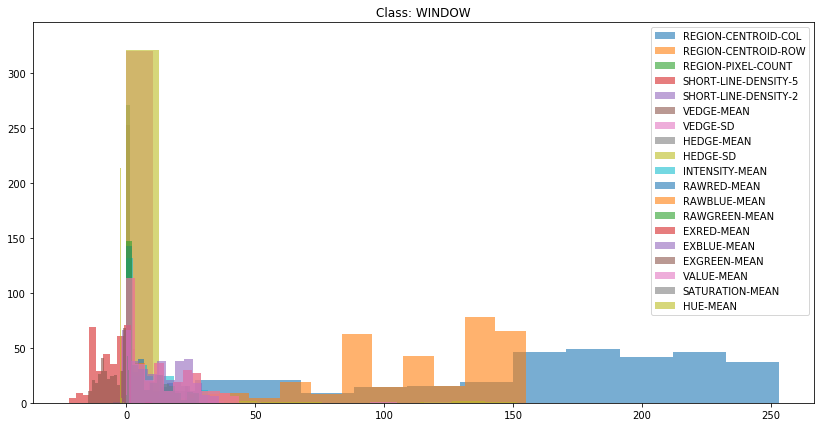

In [139]:
for cl in classes:
    plt_histogram(cl, 12)


# Data Preprocessing

## Normalization

In [140]:
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


### Method 1

In [141]:
data = df.drop(columns=["CLASS"])
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
normalized_data_1 = scaler.fit_transform(data)

### Method 2

In [142]:
normalized_data_2 = stats.zscore(data)
# replace nan with zero
normalized_data_2[np.isnan(normalized_data_2)] = 0

c:\users\win8.1\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


### Boxplots after normalization: Method 1 &  Method 2

#### MinMaxScaler vs zscore

<Figure size 432x288 with 0 Axes>

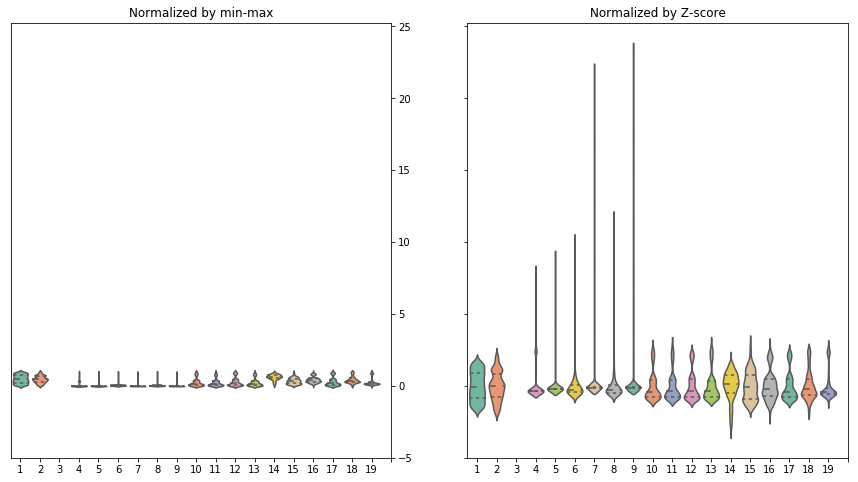

In [143]:
plt.figure()
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15,8))

sb.violinplot(ax=axes[0], data=normalized_data_1, palette="Set2", split=True,
                   scale="count", inner="quartile")

axes[0].set(xticks=range(len(df.columns)), xticklabels=range(1, len(df.columns)))
axes[0].yaxis.tick_right()
axes[0].set(title='Normalized by min-max')

sb.violinplot(ax=axes[1], data=normalized_data_2, palette="Set2", split=True,
                   scale="count", inner="quartile")

axes[1].set(xticks=range(len(df.columns)), xticklabels=range(1, len(df.columns)))
axes[1].set(title='Normalized by Z-score');

## Dimensionality reduction 

### PCA

In [144]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data_2)


In [145]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

Explained Variance  REGION-CENTROID-COL  REGION-CENTROID-ROW  \
Dimension 1              0.4234               0.0230              -0.1992   
Dimension 2              0.1620              -0.0102               0.0274   

             REGION-PIXEL-COUNT  SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  \
Dimension 1                -0.0               -0.0131                0.0095   
Dimension 2                -0.0               -0.0320                0.2568   

             VEDGE-MEAN  VEDGE-SD  HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  \
Dimension 1      0.0244    0.0144      0.0296     0.018          0.3513   
Dimension 2      0.4663    0.4811      0.4721     0.495         -0.0412   

             RAWRED-MEAN  RAWBLUE-MEAN  RAWGREEN-MEAN  EXRED-MEAN  \
Dimension 1       0.3484        0.3573         0.3430     -0.3117   
Dimension 2      -0.0467       -0.0322        -0.0461     -0.0165   

             EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  SATURATION-MEAN  HUE-MEAN  
Dimension 1       0.3283       -0.2437      0.3545          -0.2130   -0.1789  
Dimension 2       0.0257       -0.0270     -0.0354           0.0052   -0.0735

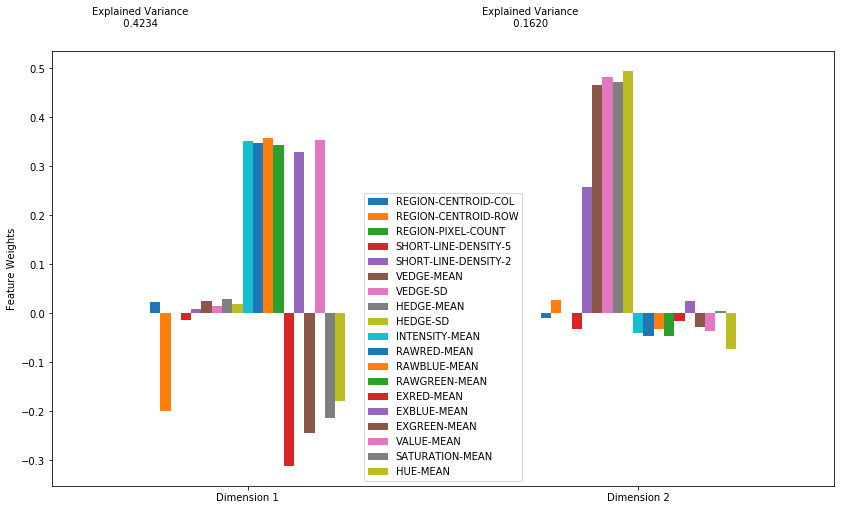

In [146]:
good_data = pd.DataFrame(normalized_data_2)
good_data.columns = df.columns[1:]

pca_results(good_data, pca)

## Visualizing a Biplot

In [147]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

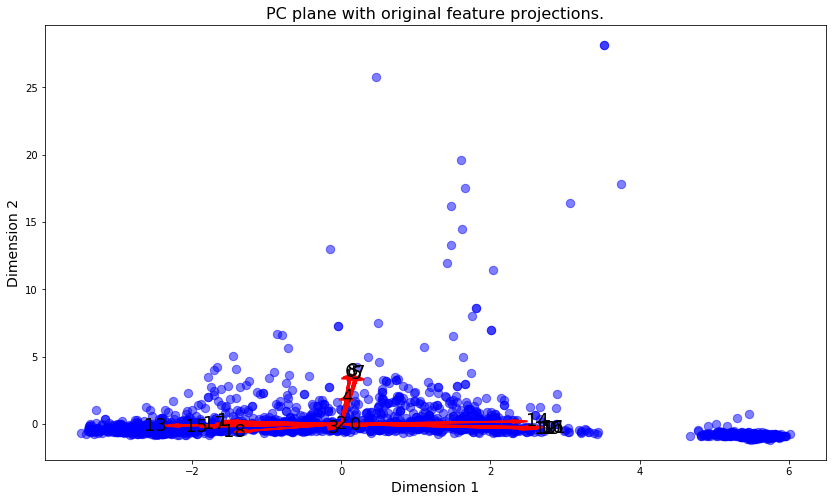

In [148]:
reduced_data = pd.DataFrame(pca_result, columns = ['Dimension 1', 'Dimension 2'])
good_data.columns = range(0,19)
biplot(good_data, reduced_data, pca);

In [149]:
pearson_corr = reduced_data.corr(method='pearson', min_periods=1)
pearson_corr

Dimension 1   Dimension 2
Dimension 1  1.000000e+00  4.917512e-17
Dimension 2  4.917512e-17  1.000000e+00

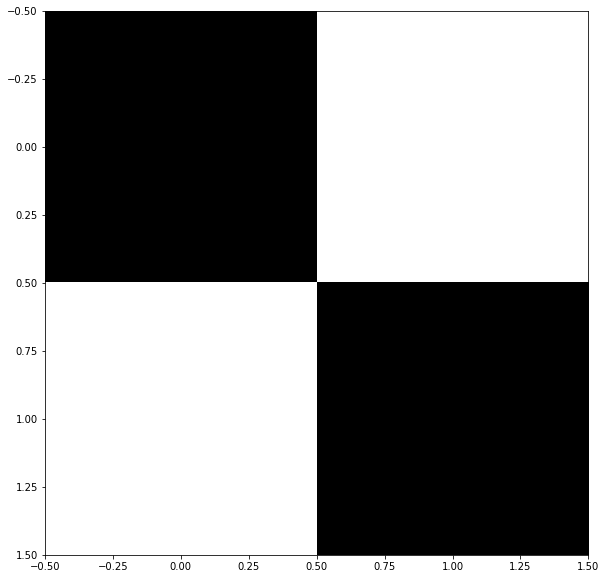

In [150]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(pearson_corr, interpolation='None', cmap=cm.gray_r)
plt.show()

### Feature Selection

In [151]:
from sklearn.feature_selection import SelectKBest

X_new  = SelectKBest(k=3).fit_transform(df.drop(columns=["CLASS"]), df['CLASS'])
X_new = pd.DataFrame(X_new)
X_new.head()

c:\users\win8.1\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [2] are constant.
  UserWarning)
c:\users\win8.1\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0         1         2
0  6.185185  3.555556 -1.121818
1  6.666666  3.888889 -0.924817
2  6.111111  3.555556 -0.965946
3  5.851852  3.333333 -0.744272
4  6.037037  3.444444 -1.175773

##### Correlation Matrix

In [152]:
pearson_corr = X_new.corr(method='pearson', min_periods=1)
pearson_corr

0         1         2
0  1.000000  0.995842 -0.329845
1  0.995842  1.000000 -0.261516
2 -0.329845 -0.261516  1.000000

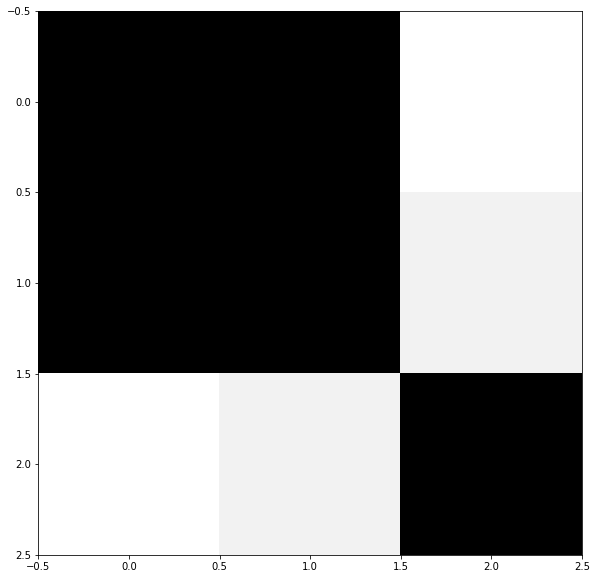

In [153]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(pearson_corr, interpolation='None', cmap=cm.gray_r)
plt.show()

##### Other plots

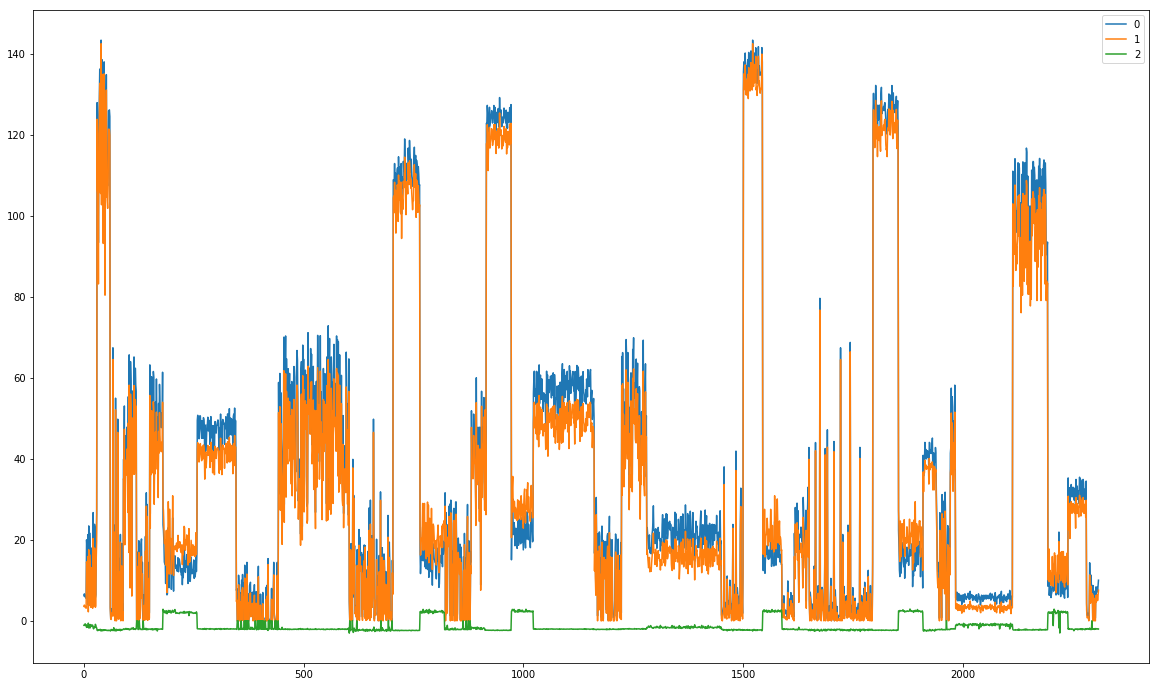

In [154]:
X_new.plot(figsize=(20,12));

In [155]:
Modified_X_new = X_new.copy()
Modified_X_new.set_index(df['CLASS'], inplace=True)
Modified_X_new.reset_index(inplace=True)
Modified_X_new.rename(inplace=True, columns={"index":"CLASS"})
Modified_X_new.head()

CLASS         0         1         2
0  BRICKFACE  6.185185  3.555556 -1.121818
1  BRICKFACE  6.666666  3.888889 -0.924817
2  BRICKFACE  6.111111  3.555556 -0.965946
3  BRICKFACE  5.851852  3.333333 -0.744272
4  BRICKFACE  6.037037  3.444444 -1.175773

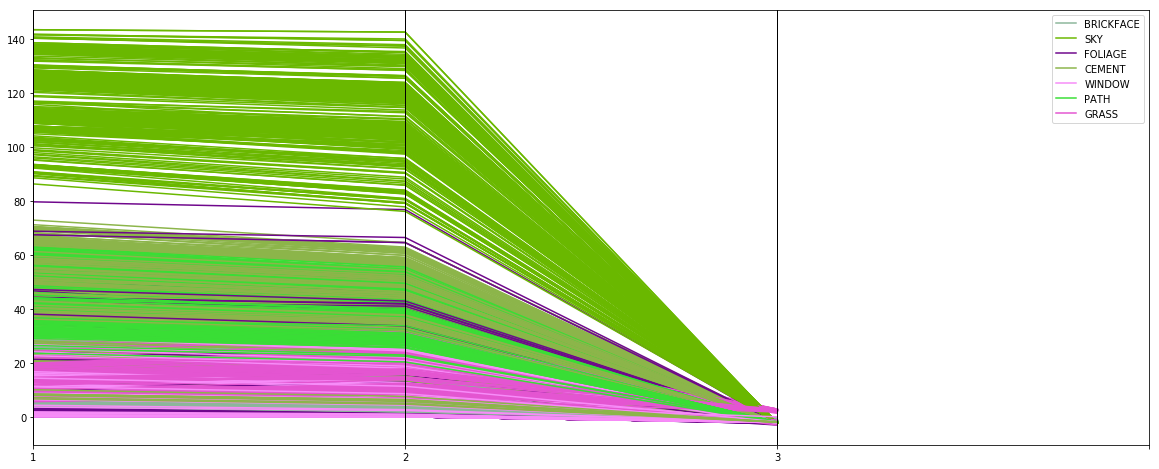

In [158]:
plt.figure(figsize=(20,8))
ax = pd.plotting.parallel_coordinates(Modified_X_new, 'CLASS');
ax.set(xticks=range(len(Modified_X_new.columns)), xticklabels=range(1, len(Modified_X_new.columns)));
ax.grid(False)


# Conclusion